# Customer Personality Analysis

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

cmap = colors.ListedColormap(["#50514f","#f25f5c","#ffe066","#247ba0","#70c1b3"])
palette = ["#50514f","#f25f5c","#ffe066","#247ba0","#70c1b3"]
sns.set(rc={"axes.facecolor":"#fff2b2", "figure.facecolor":"#fff2b2"})

%matplotlib inline

## Dataset

In [3]:
data = pd.read_csv('data/marketing_campaign.csv', sep='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
df = data.copy()

## Data Cleaning

In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
1      2174        1954  Graduation         Single   46344.0        1   
2      4141        1965  Graduation       Together   71613.0        0   
3      6182        1984  Graduation       Together   26646.0        1   
4      5324        1981         PhD        Married   58293.0        1   
5      7446        1967      Master       Together   62513.0        0   
6       965        1971  Graduation       Divorced   55635.0        0   
7      6177        1985         PhD        Married   33454.0        1   
8      4855        1974         PhD       Together   30351.0        1   
9      5899        1950         PhD       Together    5648.0        1   
10     1994        1983  Graduation        Married       NaN        1   
11      387        1976       Basic        Married    7500.0        0   
12     2125        1959  Graduation       Divorced   63033.0        0   
13     8180        1952      Master       Divorced   59354.0        1   
14     2569        1987  Graduation        Married   17323.0        0   
15     2114        1946         PhD         Single   82800.0        0   
16     9736        1980  Graduation        Married   41850.0        1   
17     4939        1946  Graduation       Together   37760.0        0   
18     6565        1949      Master        Married   76995.0        0   
19     2278        1985    2n Cycle         Single   33812.0        1   
20     9360        1982  Graduation        Married   37040.0        0   
21     5376        1979  Graduation        Married    2447.0        1   
22     1993        1949         PhD        Married   58607.0        0   
23     4047        1954         PhD        Married   65324.0        0   
24     1409        1951  Graduation       Together   40689.0        0   
25     7892        1969  Graduation         Single   18589.0        0   
26     2404        1976  Graduation        Married   53359.0        1   
27     5255        1986  Graduation         Single       NaN        1   
28     9422        1989  Graduation        Married   38360.0        1   
29     1966        1965         PhD        Married   84618.0        0   
30     6864        1989      Master       Divorced   10979.0        0   
31     3033        1963      Master       Together   38620.0        0   
32     5710        1970  Graduation       Together   40548.0        0   
33     7373        1952         PhD       Divorced   46610.0        0   
34     8755        1946      Master        Married   68657.0        0   
35    10738        1951      Master         Single   49389.0        1   
36     4339        1970         PhD        Married   67353.0        0   
37    10755        1976    2n Cycle        Married   23718.0        1   
38     8595        1973  Graduation          Widow   42429.0        0   
39     2968        1943         PhD       Divorced   48948.0        0   
40     8601        1980  Graduation        Married   80011.0        0   
41      503        1985      Master        Married   20559.0        1   
42     8430        1957  Graduation       Together   21994.0        0   
43     7281        1959         PhD         Single       NaN        0   
44     2139        1975      Master        Married    7500.0        1   
45     1371        1976  Graduation         Single   79941.0        0   
46     9909        1996    2n Cycle        Married    7500.0        0   
47     7286        1968  Graduation       Together   41728.0        1   
48     7244        1951  Graduation         Single       NaN        2   
49     6566        1954         PhD        Married   72550.0        1   
50     8614        1957  Graduation          Widow   65486.0        0   
51     4114        1964      Master        Married   79143.0        0   
52     1331        1977  Graduation         Single   35790.0        1   
53     2225        1977  Graduation       Divorced   82582.0       

In [8]:
df_cleaned = df.dropna(subset=['Income'], axis=0)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [9]:
df = df_cleaned.copy()

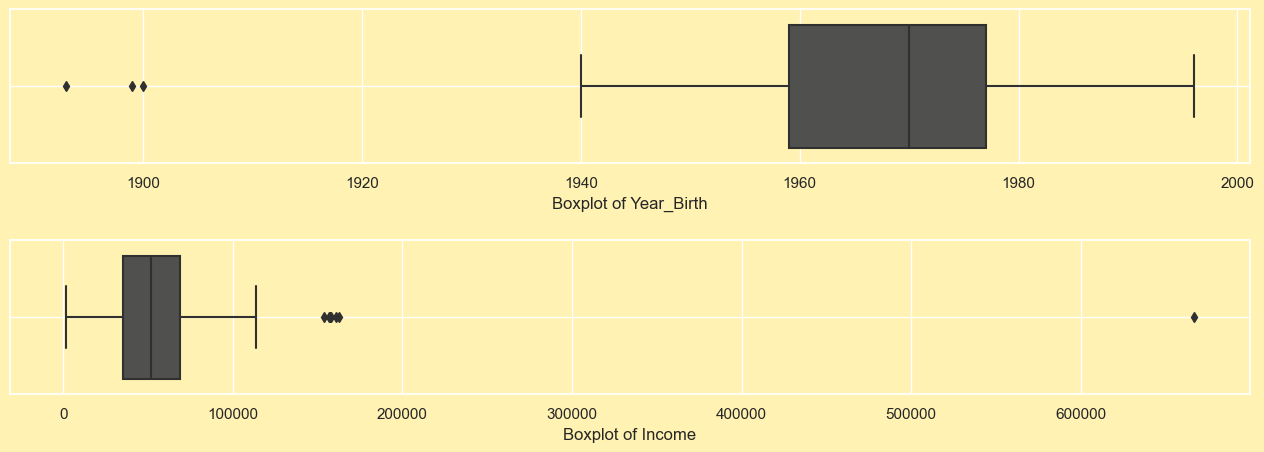

In [10]:
columns = ['Year_Birth', 'Income']

plt.figure(figsize=(16, 5))

n = 0
for col in columns:
    n += 1
    plt.subplot(2, 1, n)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=df[col], palette=palette)
    plt.grid(True)
    plt.xlabel(f'Boxplot of {col}')

plt.show()

In [11]:
df_outliers = df.copy()

df_outliers = df_outliers[df_outliers['Year_Birth'] > 1940]
df_outliers = df_outliers[df_outliers['Income'] < 120000]

In [12]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2204 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2204 non-null   int64  
 1   Year_Birth           2204 non-null   int64  
 2   Education            2204 non-null   object 
 3   Marital_Status       2204 non-null   object 
 4   Income               2204 non-null   float64
 5   Kidhome              2204 non-null   int64  
 6   Teenhome             2204 non-null   int64  
 7   Dt_Customer          2204 non-null   object 
 8   Recency              2204 non-null   int64  
 9   MntWines             2204 non-null   int64  
 10  MntFruits            2204 non-null   int64  
 11  MntMeatProducts      2204 non-null   int64  
 12  MntFishProducts      2204 non-null   int64  
 13  MntSweetProducts     2204 non-null   int64  
 14  MntGoldProds         2204 non-null   int64  
 15  NumDealsPurchases    2204 non-null   int64 

In [13]:
df = df_outliers.copy()

## Feature Engineering

In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Feature `Age`

I am creating the feature `Age` using the `Year_Birth` feature and the most recent customer date from the feature `Dt_Customer`.

Reasons of taking the most recent date of purchase:

Because this data shows the behaviour of the customers at a cetain point of time, it is meaningful to give insights based on the age of the customers at that time. Although it might be useless now because a certain amount of time already has passed but I think if we take their current age into account which means subtracting from 2023(current year) will give wrong behaviour patterns. For example, a customer who was single and had age of 25 at that time will have completely different behaviour pattern now because he has gotten older. Here, I am trying to understand of the customers with the right age and at that time what their behaviour was.

*This is how I thought of appraching this problem, others are free to take any other assumptions.*

In [15]:
sorted(df['Year_Birth'].unique())

[1941,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996]

In [16]:
df_date = df.copy()
df_date['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2204 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2204 non-null   int64         
 1   Year_Birth           2204 non-null   int64         
 2   Education            2204 non-null   object        
 3   Marital_Status       2204 non-null   object        
 4   Income               2204 non-null   float64       
 5   Kidhome              2204 non-null   int64         
 6   Teenhome             2204 non-null   int64         
 7   Dt_Customer          2204 non-null   datetime64[ns]
 8   Recency              2204 non-null   int64         
 9   MntWines             2204 non-null   int64         
 10  MntFruits            2204 non-null   int64         
 11  MntMeatProducts      2204 non-null   int64         
 12  MntFishProducts      2204 non-null   int64         
 13  MntSweetProducts     2204 non-null   i

In [17]:
df = df_date.copy()

In [18]:
df_age = df_date.copy()
recent_year = df_age['Dt_Customer'].dt.year.max()

df_age['Age'] = recent_year - df_age['Year_Birth']
df_age.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age  
0              3         11         1   57  
1              3         11         0   60  
2              3         11         0   49  
3              3         11         0   30  
4              3         11         0   33

In [19]:
sorted(df_age['Age'].unique())

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 73]

In [20]:
df = df_age.copy()

### Feature `Customer_For`

I am creating another feature `Customer_For` indicating how much time the customer have been with us since he first registered.

I will use the feature `Dt_Customer` to get the feature by subtracting the first registered date from the most recent data.

In [21]:
df.shape[0]

2204

In [22]:
df['ID'].nunique()

2204

Numbers of rows and number of unique values of `ID` are same, it means that all customers are different and no same customer have purchased multiple times as for the data.

We can safely assume that each row of `Dt_Customer` feature is the registering date of the customer.

In [23]:
df_customerfor = df_age.copy()

recent_date = df_customerfor['Dt_Customer'].max()
print("Most recent date of customer coming to the shop is: ", recent_date)

df_customerfor['Customer_For'] = pd.to_numeric(recent_date - df_customerfor['Dt_Customer'])
df_customerfor.head()

Most recent date of customer coming to the shop is:  2014-06-29 00:00:00


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age       Customer_For  
0              3         11         1   57  57283200000000000  
1              3         11         0   60   9763200000000000  
2              3         11         0   49  26956800000000000  
3              3         11         0   30  12009600000000000  
4              3         11         0   33  13910400000000000

In [24]:
df = df_customerfor.copy()

### Feature `Living_With`

The feature `Living_With` takes 2 values either `Alone` or `Together` depending on whether the person is living with someone or not. It mainly depends on the `Marital_Status` of each customer.

The mapping looks something like this:
1. Alone - Single, Divorced, Widow, Alone, Absurd, YOLO
2. Together - Together, Married

In [25]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [26]:
df_livingwith = df_customerfor.copy()

df_livingwith['Living_With'] = df['Marital_Status'].replace({'Single': 'Alone', 'Divorced': 'Alone', 
                                                             'Widow': 'Alone', 'Alone': 'Alone', 
                                                             'Absurd': 'Alone', 'YOLO':'Alone', 
                                                             'Together': 'Together', 'Married': 'Together'})

df_livingwith.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age       Customer_For Living_With  
0              3         11         1   57  57283200000000000       Alone  
1              3         11         0   60   9763200000000000       Alone  
2              3         11         0   49  26956800000000000    Together  
3              3         11         0   30  12009600000000000    Together  
4              3         11         0   33  13910400000000000    Together

In [27]:
df = df_livingwith.copy()

### Feature `Children`

This feature is simply the count of number of `Kidhome` and `Teenhome` tegether.

In [28]:
df_children = df_livingwith.copy()

df_children['Children'] = df_children['Kidhome'] + df_children['Teenhome']
df_children.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age       Customer_For Living_With  \
0              3         11         1   57  57283200000000000       Alone   
1              3         11         0   60   9763200000000000       Alone   
2              3         11         0   49  26956800000000000    Together   
3              3         11         0   30  12009600000000000    Together   
4              3         11         0   33  13910400000000000    Together   

   Children  
0         0  
1         2  
2         0  
3         1  
4         1

In [29]:
df = df_children.copy()

### Feature `Family_Size`

This features counts the number of people present in the house of the customer including the customer himself. It can be derived by adding `Children` and 1 if `Living_With = Alone` or 2 if `Living_With = Tegether`.

In [30]:
df_familysize = df_children.copy()

df_familysize['Family_Size'] = df_familysize['Children'] + df_familysize['Living_With'].replace({'Alone': 1, 'Together': 2})
df_familysize.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age       Customer_For Living_With  \
0              3         11         1   57  57283200000000000       Alone   
1              3         11         0   60   9763200000000000       Alone   
2              3         11         0   49  26956800000000000    Together   
3              3         11         0   30  12009600000000000    Together   
4              3         11         0   33  13910400000000000    Together   

   Children  Family_Size  
0         0            1  
1         2            3  
2         0            2  
3         1            3  
4         1            3

In [31]:
df = df_familysize.copy()

### Modify feature `Education`

Instead of having all different values of `Education` feature. We can simply say `UnderGraduate` and `PostGraduate` based on the following rule:
- Basic, Graduation, 2n Cycle : UnderGraduate
- Master, PhD : PostGraduate

In [32]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [33]:
df_education = df_familysize.copy()

df_education['Education'] = df_education['Education'].replace({'Basic': 'UnderGraduate', 'Graduation': 'UnderGraduate', '2n Cycle': 'UnderGraduate', 
                                                             'Master': 'PostGraduate', 'PhD': 'PostGraduate'})
df_education.head()

ID  Year_Birth      Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  UnderGraduate         Single  58138.0        0         0   
1  2174        1954  UnderGraduate         Single  46344.0        1         1   
2  4141        1965  UnderGraduate       Together  71613.0        0         0   
3  6182        1984  UnderGraduate       Together  26646.0        1         0   
4  5324        1981   PostGraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age       Customer_For Living_With  \
0              3         11         1   57  57283200000000000       Alone   
1              3         11         0   60   9763200000000000       Alone   
2              3         11         0   49  26956800000000000    Together   
3              3         11         0   30  12009600000000000    Together   
4              3         11         0   33  13910400000000000    Together   

   Children  Family_Size  
0         0            1  
1         2            3  
2         0            2  
3         1            3  
4         1            3

In [34]:
df = df_education.copy()

### Feature `Spent`

This feature indicates how much the customer has spent on buying wine, fruit, meat, fish, sweet, gold. We are just totaling all the values of columns where customer has purchased any or more products.

In [35]:
df_spent = df_education.copy()

df_spent['Spent'] = df_spent['MntWines'] + df_spent['MntFruits'] + df_spent['MntMeatProducts'] + df_spent['MntFishProducts'] + df_spent['MntSweetProducts'] + df_spent['MntGoldProds']
df_spent.head()

ID  Year_Birth      Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  UnderGraduate         Single  58138.0        0         0   
1  2174        1954  UnderGraduate         Single  46344.0        1         1   
2  4141        1965  UnderGraduate       Together  71613.0        0         0   
3  6182        1984  UnderGraduate       Together  26646.0        1         0   
4  5324        1981   PostGraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age       Customer_For Living_With  \
0              3         11         1   57  57283200000000000       Alone   
1              3         11         0   60   9763200000000000       Alone   
2              3         11         0   49  26956800000000000    Together   
3              3         11         0   30  12009600000000000    Together   
4              3         11         0   33  13910400000000000    Together   

   Children  Family_Size  Spent  
0         0            1   1617  
1         2            3     27  
2         0            2    776  
3         1            3     53  
4         1            3    422

In [36]:
df = df_spent.copy()

### Feature `Is_Parent`

This feature tells whether the customer is a parent or not. It is indicated by the value of `Children` feature, if atleast 1 child is present then he/she is a parent otherwise not.

In [37]:
df_isparent = df_spent.copy()

df_isparent['Is_Parent'] = np.where(df_isparent['Children']>0, 1, 0)
df_isparent.head()

ID  Year_Birth      Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  UnderGraduate         Single  58138.0        0         0   
1  2174        1954  UnderGraduate         Single  46344.0        1         1   
2  4141        1965  UnderGraduate       Together  71613.0        0         0   
3  6182        1984  UnderGraduate       Together  26646.0        1         0   
4  5324        1981   PostGraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age       Customer_For Living_With  \
0              3         11         1   57  57283200000000000       Alone   
1              3         11         0   60   9763200000000000       Alone   
2              3         11         0   49  26956800000000000    Together   
3              3         11         0   30  12009600000000000    Together   
4              3         11         0   33  13910400000000000    Together   

   Children  Family_Size  Spent  Is_Parent  
0         0            1   1617          0  
1         2            3     27          1  
2         0            2    776          0  
3         1            3     53          1  
4         1            3    422          1

In [38]:
df = df_isparent.copy()

### Feature rename and selection

In [39]:
df_renamed = df_isparent.rename(columns={'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meat', 
                'MntFishProducts': 'Fish', 'MntSweetProducts': 'Sweet', 'MntGoldProds': 'Gold'})

In [40]:
df_renamed.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_For', 'Living_With', 'Children', 'Family_Size',
       'Spent', 'Is_Parent'],
      dtype='object')

In [41]:
columns = ['Income', 'Education', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_For', 'Living_With', 'Children', 'Family_Size', 'Spent', 'Is_Parent']
df_featured = df_renamed[columns]
df_featured.head()

Income      Education  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0  58138.0  UnderGraduate        0         0       58    635      88   546   
1  46344.0  UnderGraduate        1         1       38     11       1     6   
2  71613.0  UnderGraduate        0         0       26    426      49   127   
3  26646.0  UnderGraduate        1         0       26     11       4    20   
4  58293.0   PostGraduate        1         0       94    173      43   118   

   Fish  Sweet  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0   172     88    88                  3                8                   10   
1     2      1     6                  2                1                    1   
2   111     21    42                  1                8                    2   
3    10      3     5                  2                2                    0   
4    46     27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   57   
1             0             0             0         0         0   60   
2             0             0             0         0         0   49   
3             0             0             0         0         0   30   
4             0             0             0         0         0   33   

        Customer_For Living_With  Children  Family_Size  Spent  Is_Parent  
0  57283200000000000       Alone         0            1   1617          0  
1   9763200000000000       Alone         2            3     27          1  
2  26956800000000000    Together         0            2    776          0  
3  12009600000000000    Together         1            3     53          1  
4  13910400000000000    Together         1            3    422          1

In [42]:
df = df_featured.copy()

## Data Preprocessing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2204 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2204 non-null   float64
 1   Education            2204 non-null   object 
 2   Kidhome              2204 non-null   int64  
 3   Teenhome             2204 non-null   int64  
 4   Recency              2204 non-null   int64  
 5   Wines                2204 non-null   int64  
 6   Fruits               2204 non-null   int64  
 7   Meat                 2204 non-null   int64  
 8   Fish                 2204 non-null   int64  
 9   Sweet                2204 non-null   int64  
 10  Gold                 2204 non-null   int64  
 11  NumDealsPurchases    2204 non-null   int64  
 12  NumWebPurchases      2204 non-null   int64  
 13  NumCatalogPurchases  2204 non-null   int64  
 14  NumStorePurchases    2204 non-null   int64  
 15  NumWebVisitsMonth    2204 non-null   int64 

In [44]:
categorical_features = ['Education', 'Living_With']

categorical_encoders = []

df_categorical = df[categorical_features]

for categorical_feature in categorical_features:
    le = LabelEncoder()
    le.fit(df_categorical[categorical_feature])
    categorical_encoders.append(le)
    
    df_categorical[f'Encoded_{categorical_feature}'] = le.transform(df_categorical[categorical_feature])

df_categorical.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_3764\4050622660.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[f'Encoded_{categorical_feature}'] = le.transform(df_categorical[categorical_feature])
C:\Users\HP\AppData\Local\Temp\ipykernel_3764\4050622660.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[f'Encoded_{categorical_feature}'] = le.transform(df_categorical[categorical_feature])


Education Living_With  Encoded_Education  Encoded_Living_With
0  UnderGraduate       Alone                  1                    0
1  UnderGraduate       Alone                  1                    0
2  UnderGraduate    Together                  1                    1
3  UnderGraduate    Together                  1                    1
4   PostGraduate    Together                  0                    1

In [45]:
df_encoded = df.copy()

df_encoded['Education'] = df_categorical['Encoded_Education']
df_encoded['Living_With'] = df_categorical['Encoded_Living_With']

df_encoded.head()

Income  Education  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0  58138.0          1        0         0       58    635      88   546   172   
1  46344.0          1        1         1       38     11       1     6     2   
2  71613.0          1        0         0       26    426      49   127   111   
3  26646.0          1        1         0       26     11       4    20    10   
4  58293.0          0        1         0       94    173      43   118    46   

   Sweet  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0     88    88                  3                8                   10   
1      1     6                  2                1                    1   
2     21    42                  1                8                    2   
3      3     5                  2                2                    0   
4     27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   57   
1             0             0             0         0         0   60   
2             0             0             0         0         0   49   
3             0             0             0         0         0   30   
4             0             0             0         0         0   33   

        Customer_For  Living_With  Children  Family_Size  Spent  Is_Parent  
0  57283200000000000            0         0            1   1617          0  
1   9763200000000000            0         2            3     27          1  
2  26956800000000000            1         0            2    776          0  
3  12009600000000000            1         1            3     53          1  
4  13910400000000000            1         1            3    422          1

In [46]:
df = df_encoded.copy()

In [47]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']
df_coldel = df.drop(cols_del, axis=1)

In [48]:
df = df_coldel.copy()

In [49]:
df.columns

Index(['Income', 'Education', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Age', 'Customer_For', 'Living_With',
       'Children', 'Family_Size', 'Spent', 'Is_Parent'],
      dtype='object')

In [50]:
df_scaled = df.copy()

scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

Income  Education   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  0.314569   0.783997 -0.823719 -0.931161  0.311683  0.974178  1.548116   
1 -0.254830   0.783997  1.038308  0.906152 -0.380005 -0.874842 -0.638885   
2  0.965125   0.783997 -0.823719 -0.931161 -0.795017  0.354875  0.567737   
3 -1.205824   0.783997  1.038308 -0.931161 -0.795017 -0.874842 -0.563471   
4  0.322052  -1.275514  1.038308 -0.931161  1.556721 -0.394808  0.416909   

       Meat      Fish     Sweet      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.747883  2.448550  1.479812  0.849134           0.361120         1.424319   
1 -0.731930 -0.652580 -0.635617 -0.736024          -0.169132        -1.132924   
2 -0.176268  1.335792 -0.149312 -0.040101          -0.699383         1.424319   
3 -0.667638 -0.506644 -0.586987 -0.755355          -0.169132        -0.767604   
4 -0.217598  0.150066 -0.003420 -0.562043           1.421623         0.328357   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0             2.627869          -0.562818           0.688986 -0.095695   
1            -0.588223          -1.179804          -0.139677 -0.095695   
2            -0.230879           1.288141          -0.554009 -0.095695   
3            -0.945566          -0.562818           0.274655 -0.095695   
4             0.126465           0.054168          -0.139677 -0.095695   

        Age  Customer_For  Living_With  Children  Family_Size     Spent  \
0  1.019490      1.526842    -1.348486 -1.267338    -1.760647  1.678816   
1  1.276129     -1.188354    -1.348486  1.403038     0.447928 -0.964140   
2  0.335121     -0.205947     0.741572 -1.267338    -0.656360  0.280875   
3 -1.290257     -1.059999     0.741572  0.067850     0.447928 -0.920922   
4 -1.033618     -0.951392     0.741572  0.067850     0.447928 -0.307557   

   Is_Parent  
0  -1.585923  
1   0.630548  
2  -1.585923  
3   0.630548  
4   0.630548

In [51]:
df = df_scaled.copy()

## Customer Segmentation

### Dimensionality Reduction

In [52]:
pca = PCA(n_components=3)
pca.fit(df)

df_reduced = pca.transform(df)

df_reduced.shape

(2204, 3)

In [53]:
type(df_reduced)

numpy.ndarray

In [54]:
df_reduced = pd.DataFrame(df_reduced, columns=['Dim1', 'Dim2', 'Dim3'])

In [55]:
df = df_reduced.copy()

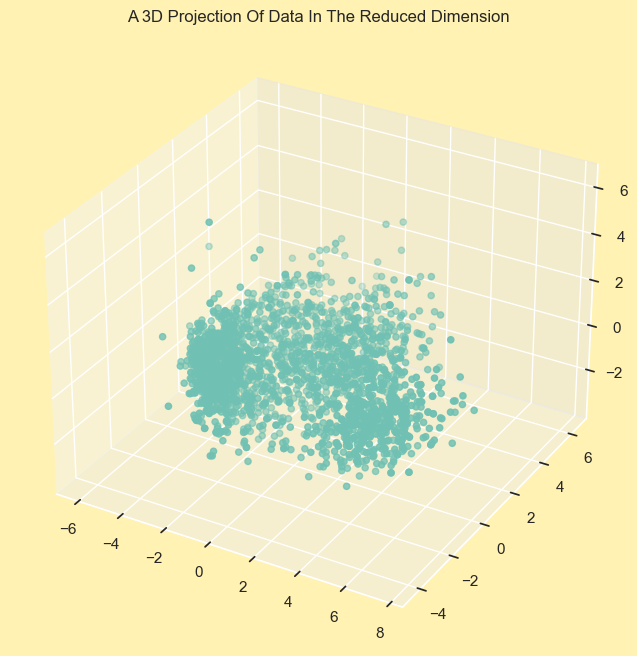

In [56]:
#A 3D Projection Of Data In The Reduced Dimension
x = df["Dim1"]
y = df["Dim2"]
z = df["Dim3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=palette[-1], marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### K-Means Clustering

In [57]:
inertias = []

for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=n, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(df)
    inertias.append(algorithm.inertia_)

inertias

d:\data\machine learning and deep learning\projects\customer-personality-analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1425: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


[28508.212404872207,
 14071.782237518804,
 9816.73925993748,
 7681.866879800914,
 6810.336550400778,
 6118.664978307135,
 5465.6734535793275,
 4944.192735263625,
 4607.620660129307,
 4311.1727775792115]

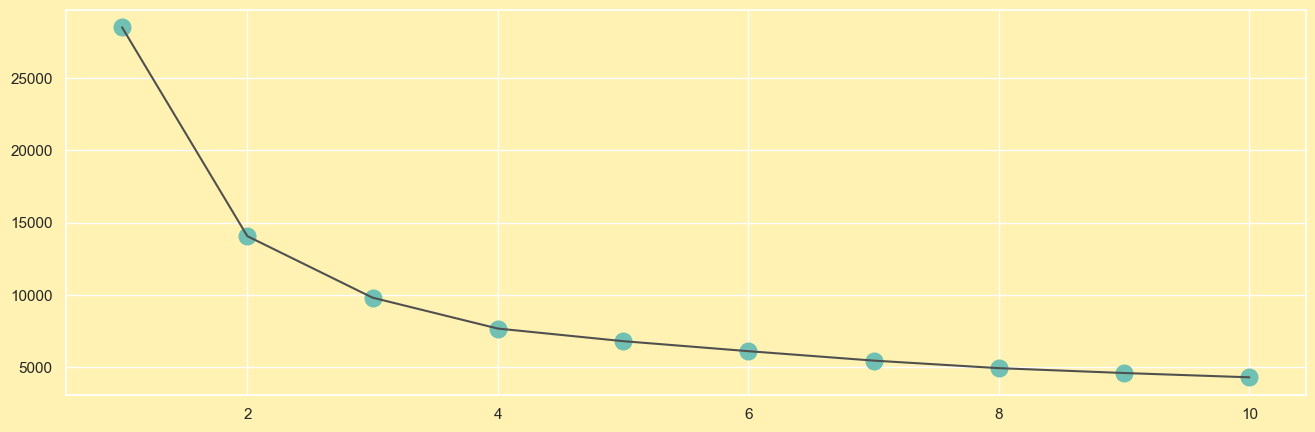

In [58]:
plt.figure(figsize=(16, 5))
x = np.array(range(1, 11))
y = np.array(inertias)

plt.plot(x, y, 'o', c=palette[-1], markersize=12)
plt.plot(x, y, '-', c=palette[0])

In [59]:
algorithm = KMeans(n_clusters=4, init='k-means++', n_init=n, tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(df)

labels = algorithm.predict(df)
labels.shape

(2204,)

In [60]:
df['Cluster'] = labels

In [61]:
df.head()

Dim1      Dim2      Dim3  Cluster
0  5.013673 -0.309677  2.496129        0
1 -2.895510 -0.068107 -1.405800        3
2  2.606923 -0.834683 -0.126674        0
3 -2.705518 -1.597155  0.124692        1
4 -0.634365  0.323115 -0.075084        3

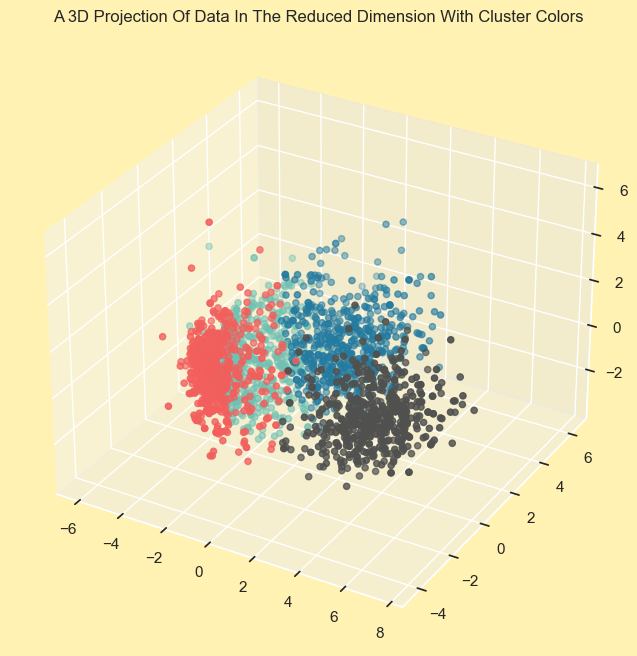

In [62]:
#A 3D Projection Of Data In The Reduced Dimension
x = df["Dim1"]
y = df["Dim2"]
z = df["Dim3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=df['Cluster'], marker="o", cmap=cmap)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension With Cluster Colors")
plt.show()

## Cluster Analysis

In [63]:
df = df_encoded.copy()
df['Cluster'] = labels

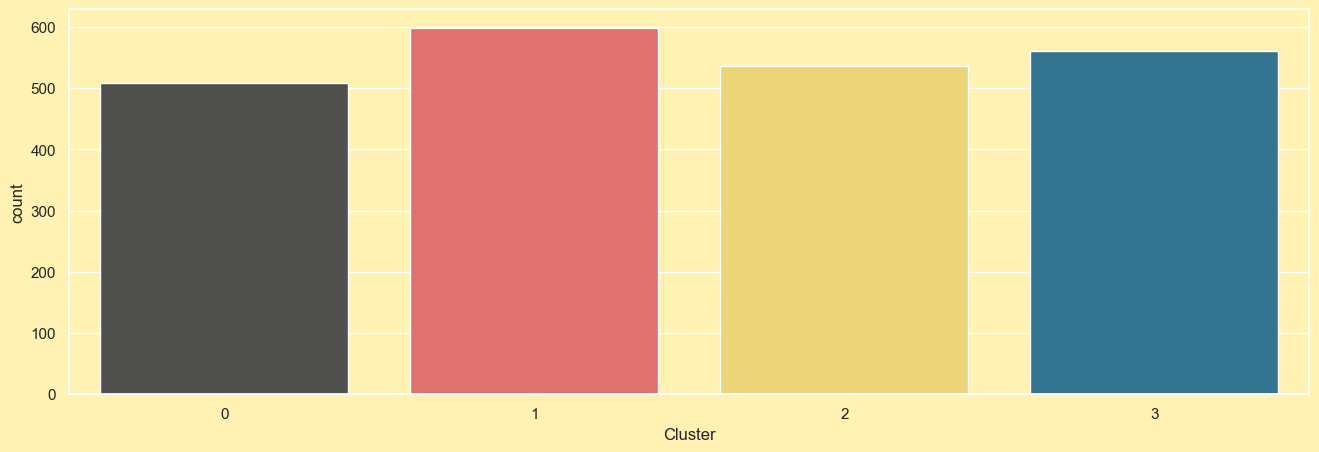

In [64]:
plt.figure(figsize=(16, 5))
sns.countplot(x=df['Cluster'], palette=palette)
plt.show()

The clusters are fairly distributed.

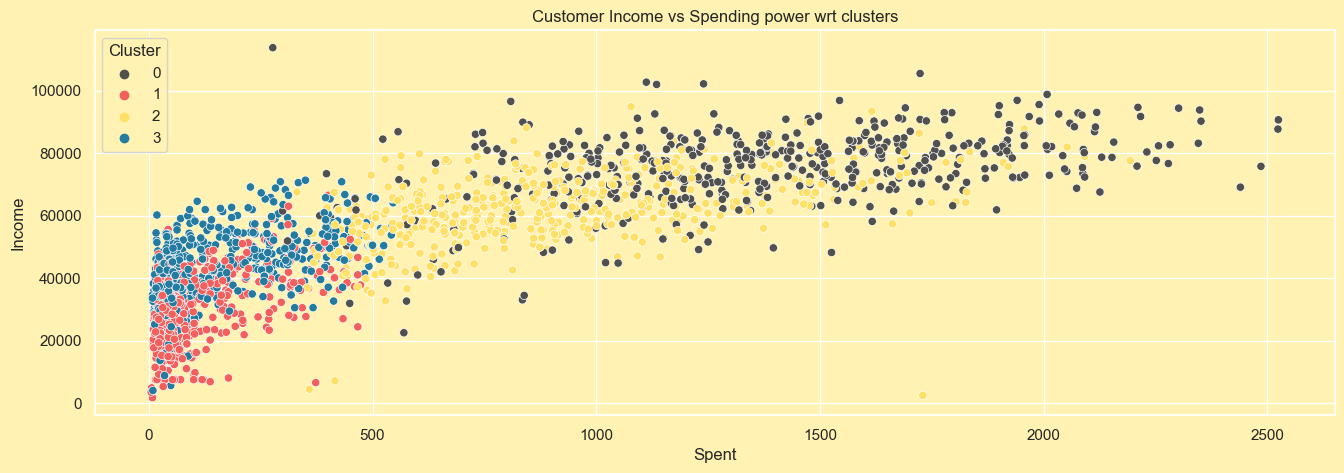

In [65]:
plt.figure(figsize=(16, 5))
sns.scatterplot(data=df, x='Spent', y='Income', hue='Cluster', palette=palette[:4])
plt.xlabel('Spent')
plt.ylabel('Income')
plt.title('Customer Income vs Spending power wrt clusters')
plt.show()

**Customer Segments and their purchasing behaviour depending on their `Income`**
- Cluster 0: High Income and High Spending
- Cluster 1: Low Income and Low Spending
- Cluster 2: High Income and Average Spending
- Cluster 3: High Income and Low Spending

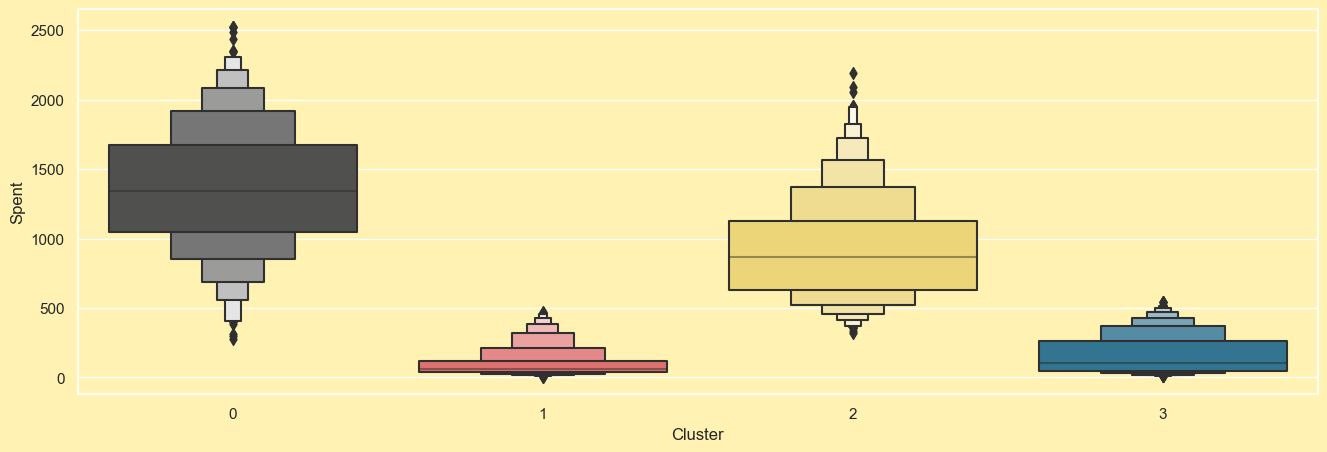

In [66]:
plt.figure(figsize=(16, 5))

sns.boxenplot(x=df['Cluster'], y=df['Spent'], palette=palette)

plt.show()

**Findings**
- Cluster 0 and Cluster 2 have high spending power and they are our main source of customers.
- Cluster 1 and cluster 3 seems to spend a lot less amount on purchasing our products but cluster 3 has many customers who spend a bit more than people from cluster 1.

In [67]:
df['Total_Promo'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

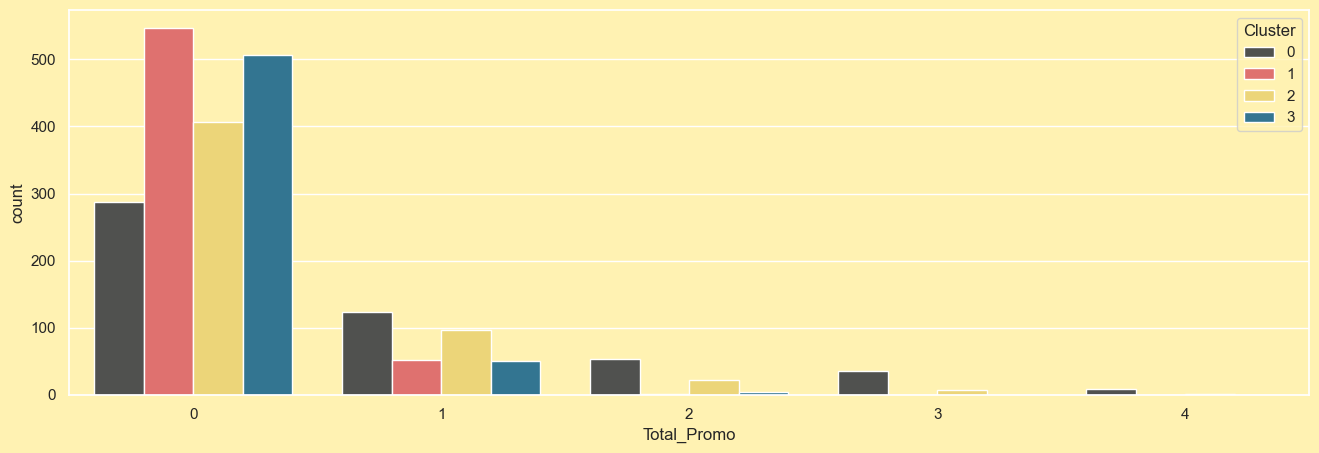

In [68]:
plt.figure(figsize=(16, 5))

sns.countplot(x=df['Total_Promo'], hue=df['Cluster'], palette=palette)

plt.show()

**Findings**
- Promotions have not been much popular.
- We can say that promotions are not particularly working and needs improvements.

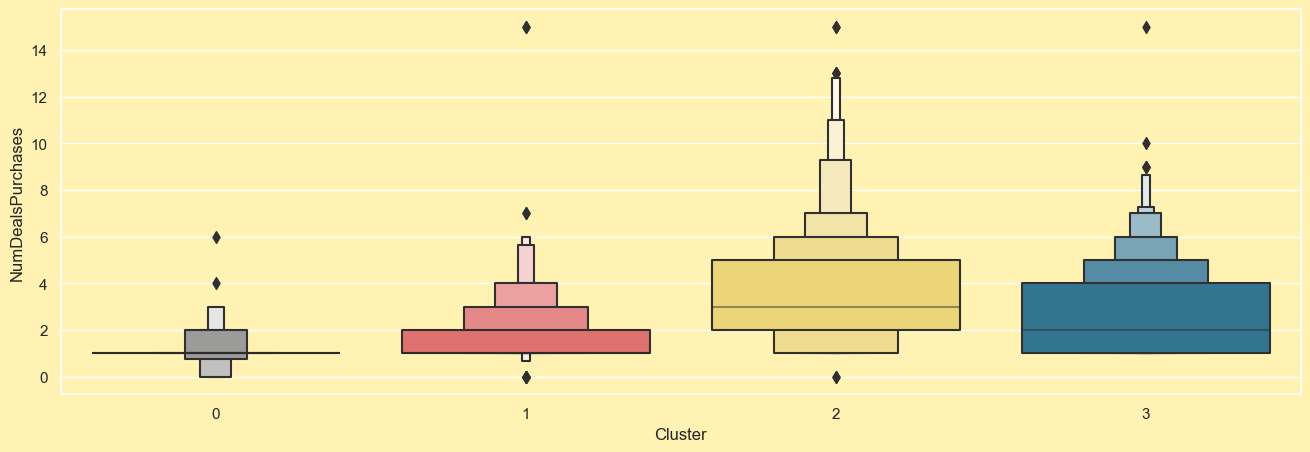

In [69]:
plt.figure(figsize=(16, 5))

sns.boxenplot(x=df['Cluster'], y=df['NumDealsPurchases'], palette=palette)

plt.show()

**Findings**
- Cluster 2 and cluster 3 are specially active when it comes to purchasing deals. There are a lot of deals purchases from cluster 2 specially and next is cluster 3.
- Although comparatively less, cluster 2 also has higher number of deals that are purchased.

## Customer Profiling

In [70]:
df.columns

Index(['Income', 'Education', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Customer_For', 'Living_With', 'Children', 'Family_Size', 'Spent',
       'Is_Parent', 'Cluster', 'Total_Promo'],
      dtype='object')

<Figure size 1600x500 with 0 Axes>

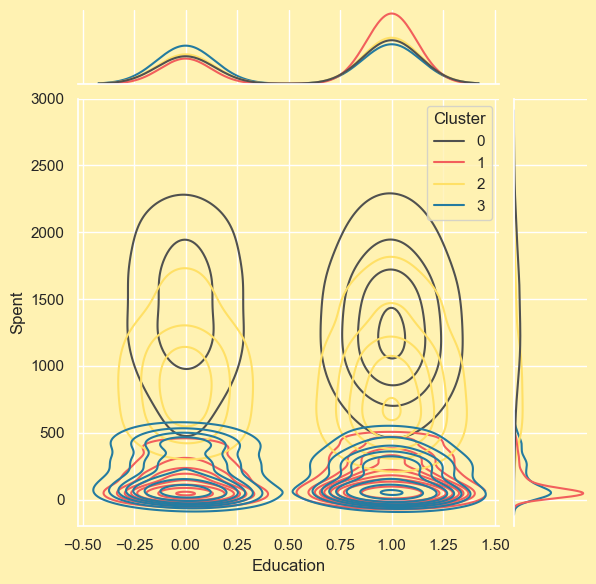

<Figure size 1600x500 with 0 Axes>

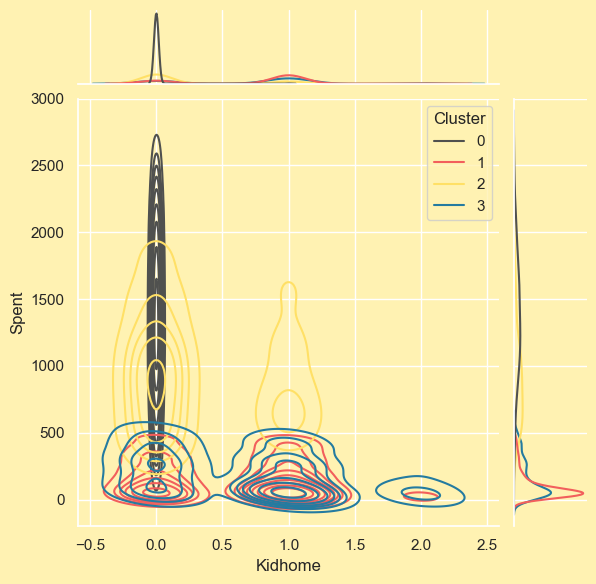

<Figure size 1600x500 with 0 Axes>

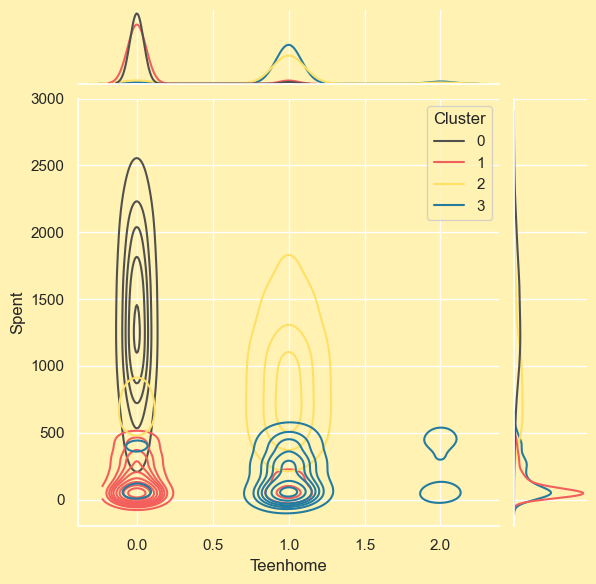

<Figure size 1600x500 with 0 Axes>

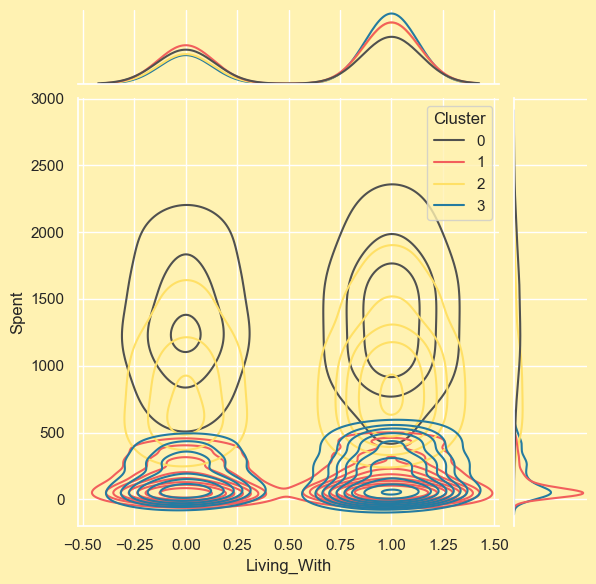

<Figure size 1600x500 with 0 Axes>

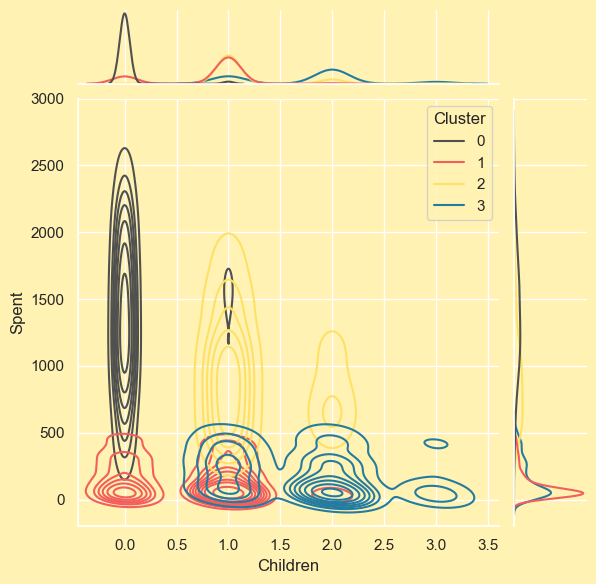

<Figure size 1600x500 with 0 Axes>

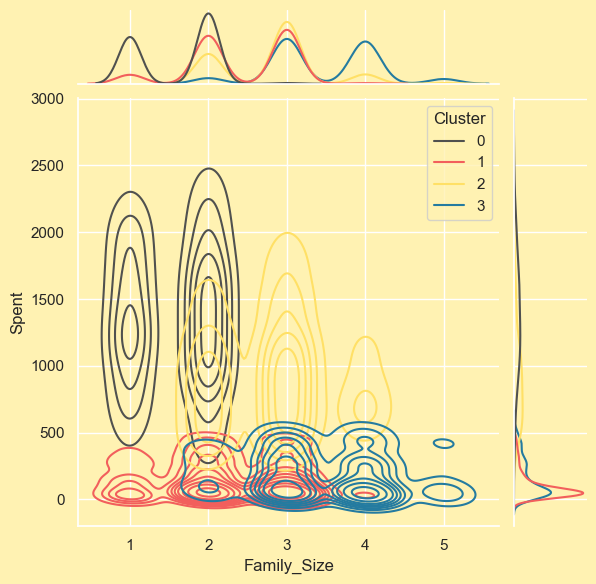

d:\data\machine learning and deep learning\projects\customer-personality-analysis\venv\lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 1600x500 with 0 Axes>

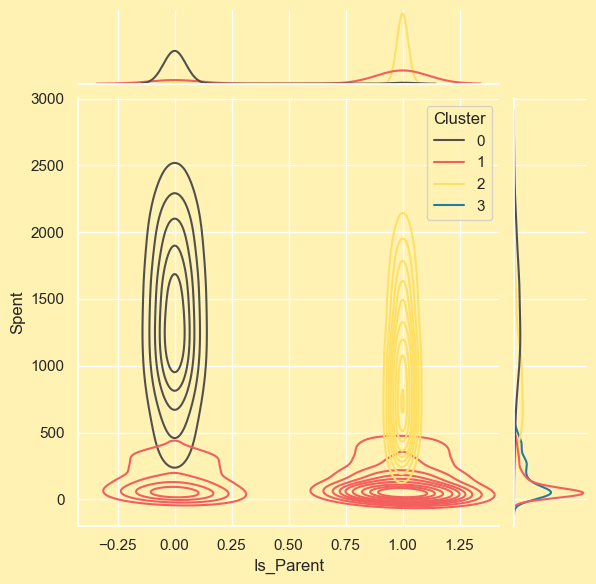

<Figure size 1600x500 with 0 Axes>

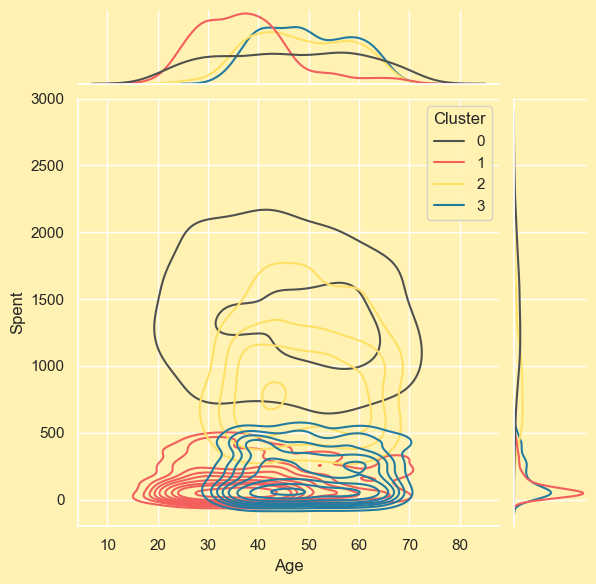

<Figure size 1600x500 with 0 Axes>

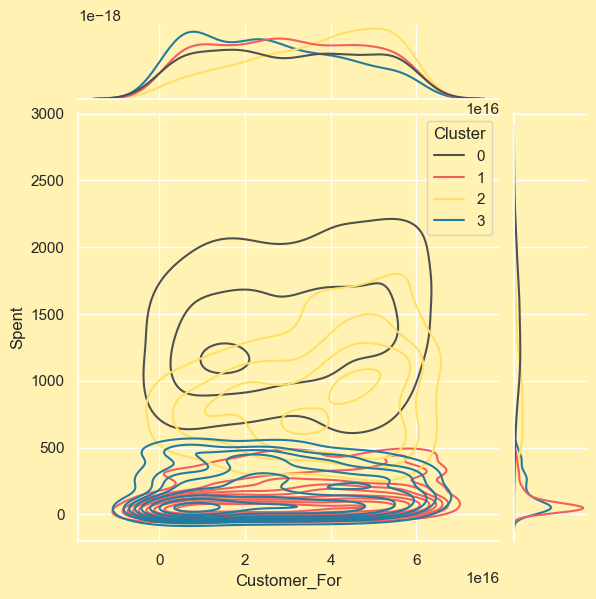

In [72]:
compare_columns = ['Education', 'Kidhome', 'Teenhome', 'Living_With', 'Children', 'Family_Size', 'Is_Parent', 'Age', 'Customer_For']

for col in compare_columns:
    plt.figure(figsize=(16, 5))
    sns.jointplot(x=df[col], y=df['Spent'], hue=df['Cluster'], kind="kde", palette=palette[:4])
    plt.show()

**Customer profiles**

1. *Cluster 0*:
   - Customers of this cluster are definitely no parents.
   - They have atmost 2 family members.
   - Some are living single and some are living with their spouse.

2. *Cluster 1*:
   - Most Customers of this cluster are parents and very few are not.
   - They have atmost 3 people in their family.
   - They are mostly young people atmost in their early 40s.
   - They don't have any teen at their home.

3. *CLuster 2*:
   - Most customers of this cluster are parents.
   - Their family size is atleast 2 and atmost 4.
   - Most of them have 1 children in their home.
   - They mostly have teens not kids.
   - They have been our customer for a longer duration.
  
4. *Cluster 3*:
   - Most customers of this cluster are not parents.
   - Their family size is atleast 2 and atmost 5.
   - They have atleast 1 children and atmost 3 children.
   - Most of the children are teens.
   - They have been our customer for shorter period of time.